In [19]:
import os
import sys

root_folder = os.path.abspath(os.path.dirname(os.getcwd()))
sys.path.append(root_folder)

print(sys.path)

import numpy as np
import numpy.linalg as la
import numpy.matlib as matl
import matplotlib.pyplot as plt

from ff_scenario import n_obs, obs, robot_radius, safety_margin, goal_region, start_region, iter_max_SCP

rl = True
save_plots = False
'''
ws_analysis_checkpoint_ff_sag_vs_dag_dyn_test31000 # the first analysis I did between S4D and ART
ws_analysis_checkpoint_ff_ctgrtg_S4D_vs_dag_dyn_test20000 # the first analysis I did between S4D and ART WITH smaller data size
wsF_analysis_checkpoint_ff_GSA_vs_checkpoint_ff_S4D_gsa_test2000 # the second anlysis for my presenta wuth marco
wsF_analysis_checkpoint_ff_GSA_vs_checkpoint_ff_S4_gsa_test2000 # FOR S4D
'''
modeltype = 'gsa'
############# S6
# traj_data = np.load(root_folder + '/optimization/saved_files/warmstarting/ws_analysis_checkpoint_ff_ctgrtg_art_vs_dag_dyn_test9000.npz')
if modeltype == 'gsa':    
    ############## S4D
    # traj_data = np.load(root_folder + '/optimization/saved_files/warmstarting/ws_analysis_checkpoint_ff_ctgrtg_art_vs_dag_dyn_test9000.npz')
    traj_data = np.load(root_folder + '/optimization/saved_files/warmstarting_s4d/wsF_analysis_checkpoint_ff_GSA_vs_checkpoint_ff_S4_gsa_test2000.npz')
else:
    traj_data = np.load(root_folder + '/optimization/saved_files/warmstarting_S4FULL/wsF_analysis_checkpoint_ff_ctgrtg_art_vs_checkpoint_ff_S4_rcgsa_test2000.npz')



n = len(traj_data['test_dataset_ix'])#20001#
n = 2001
J_vect_scp_cvx = traj_data['J_vect_scp_cvx'][:n]
J_vect_scp_DT =  traj_data['J_vect_scp_DT'][:n]
# J_vect_scp_dag =  traj_data['J_vect_scp_dag'][:n]
J_vect_scp_S4D = traj_data['J_vect_scp_S4D'][:n]
J_cvx =  traj_data['J_cvx'][:n]
J_DT =  traj_data['J_DT'][:n]
# J_dag =  traj_data['J_dag'][:n]
J_S4D = traj_data['J_S4D'][:n]
iter_scp_cvx =  traj_data['iter_scp_cvx'][:n]
iter_scp_DT =  traj_data['iter_scp_DT'][:n]
# iter_scp_dag =  traj_data['iter_scp_dag'][:n]
iter_scp_S4D = traj_data['iter_scp_S4D'][:n]
runtime_cvx =  traj_data['runtime_cvx'][:n]
runtime_DT =  traj_data['runtime_DT'][:n]
# runtime_dag = traj_data['runtime_dag'][:n]
runtime_S4D = traj_data['runtime_S4D'][:n]
runtime_scp_cvx =  traj_data['runtime_scp_cvx'][:n]
runtime_scp_DT =  traj_data['runtime_scp_DT'][:n]
# runtime_scp_dag =  traj_data['runtime_scp_dag'][:n]
runtime_scp_S4D = traj_data['runtime_scp_S4D'][:n]
ctgs0_cvx =  traj_data['ctgs0_cvx'][:n]
cvx_problem =  traj_data['cvx_problem'][:n]
test_dataset_ix =  np.arange(len(traj_data['test_dataset_ix'][:n]))
i_unfeas_cvx =  traj_data['i_unfeas_cvx'][traj_data['i_unfeas_cvx'] <= n]
i_unfeas_scp_cvx =  traj_data['i_unfeas_scp_cvx'][traj_data['i_unfeas_scp_cvx'] <= n]
i_unfeas_DT =  traj_data['i_unfeas_DT'][traj_data['i_unfeas_DT'] <= n]
# i_unfeas_scp_dag =  traj_data['i_unfeas_scp_dag'][:n]
i_unfeas_S4D = traj_data['i_unfeas_scp_S4D'][traj_data['i_unfeas_scp_S4D'] <= n]
x_init = traj_data['state_init']
x_final = traj_data['state_final']
print(n)

['/home/arpit/miniforge3/envs/MAMBA/lib/python310.zip', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/lib-dynload', '', '/home/arpit/.local/lib/python3.10/site-packages', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/site-packages', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/site-packages/mamba_ssm-2.2.4-py3.10-linux-x86_64.egg', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/site-packages/setuptools-75.6.0-py3.10.egg', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/site-packages/setuptools/_vendor', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/transformermpc_ral24/freeflyer']
2001


In [20]:
# total unfeasible problem given by CVX
# total unfeasible problem given by SSM
# total unfeasible problem given by ART
print('CVX', len(i_unfeas_scp_cvx)/n*100)
print('SSM',len(i_unfeas_S4D)/n*100)
print('ART',len(i_unfeas_DT)/n*100)


CVX 14.3928035982009
SSM 34.73263368315842
ART 0.8495752123938031


In [21]:
set_unf_scp_cvx = set(i_unfeas_scp_cvx)
set_unf_scp_DT = set(i_unfeas_DT)
set_unf_scp_S4D = set(i_unfeas_S4D)
i_unfeas_cvx_DT = list(set_unf_scp_cvx - set_unf_scp_DT)
i_unfeas_cvx_S4D = list(set_unf_scp_cvx - set_unf_scp_S4D)


In [22]:
x_init_infeas_scp_cvx = x_init[i_unfeas_scp_cvx]
x_init_infeas_scp_DT = x_init[i_unfeas_DT]
x_init_infeas_scp_S4D = x_init[i_unfeas_S4D]
x_final_infeas_scp_cvx = x_final[i_unfeas_scp_cvx]
x_final_infeas_scp_DT = x_final[i_unfeas_DT]
x_final_infeas_scp_S4D = x_final[i_unfeas_S4D]

In [23]:
unfeas_lines = np.concatenate((x_init_infeas_scp_cvx[:,:,None], x_final_infeas_scp_cvx[:,:,None]), axis=2)
unfeas_lines_DT = np.concatenate((x_init_infeas_scp_DT[:,:,None], x_final_infeas_scp_DT[:,:,None]), axis=2)
unfeas_lines_S4D = np.concatenate((x_init_infeas_scp_S4D[:,:,None], x_final_infeas_scp_S4D[:,:,None]), axis=2)

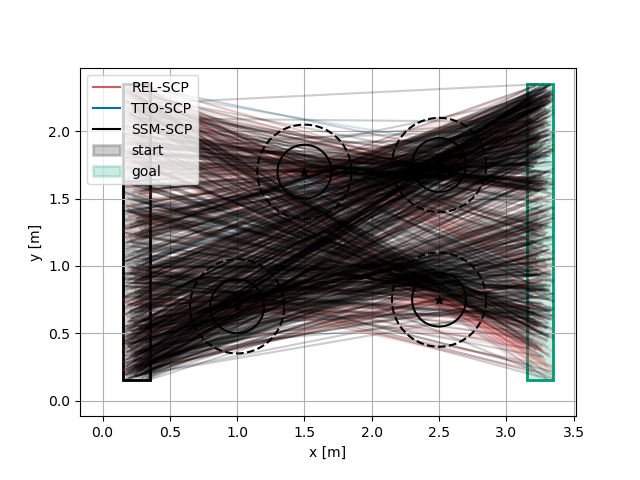

In [24]:
%matplotlib ipympl
from matplotlib.patches import Circle, Rectangle
plt.style.use('seaborn-v0_8-colorblind')
plt.figure()
dim1 = 0
dim2 = 1
ax = plt.axes()#projection='3d')
#ax.scatter3D(x_init_infeas_scp_cvx[:,0],x_init_infeas_scp_cvx[:,1],x_init_infeas_scp_cvx[:,2])
ax.plot(unfeas_lines[:,dim1,:].T, unfeas_lines[:,dim2,:].T, c='indianred', alpha=0.2)#, unfeas_lines[:,2,:].T)
ax.plot(unfeas_lines_DT[:,dim1,:].T, unfeas_lines_DT[:,dim2,:].T, c='C0', alpha=0.2)
ax.plot(unfeas_lines_S4D[:,dim1,:].T, unfeas_lines_S4D[:,dim2,:].T, c='black', alpha=0.2)
ax.plot(0, 0, c='indianred', label='REL-SCP')
ax.plot(0, 0, c='C0', label='TTO-SCP')
ax.plot(0, 0, c='black', label='SSM-SCP')
ax.add_patch(Rectangle(start_region['xy_low'], start_region['xy_up'][0] - start_region['xy_low'][0], start_region['xy_up'][1] - start_region['xy_low'][1], fc ='none', ec ='black', alpha=1., lw = 2, zorder=1))
ax.add_patch(Rectangle(goal_region['xy_low'], goal_region['xy_up'][0] - goal_region['xy_low'][0], goal_region['xy_up'][1] - goal_region['xy_low'][1], fc ='none', ec ='C1', alpha=1., lw = 2, zorder=1))
ax.add_patch(Rectangle(start_region['xy_low'], start_region['xy_up'][0] - start_region['xy_low'][0], start_region['xy_up'][1] - start_region['xy_low'][1], fc ='black', ec ='black', alpha=0.2, lw = 2, zorder=1, label='start'))
ax.add_patch(Rectangle(goal_region['xy_low'], goal_region['xy_up'][0] - goal_region['xy_low'][0], goal_region['xy_up'][1] - goal_region['xy_low'][1], fc ='C1', ec ='C1', alpha=0.2, lw = 2, zorder=1, label='goal')) 
ax.set_aspect('equal')
for i in range(n_obs):
    p = obs['position'][i]
    r = obs['radius'][i]
    r_plus = (obs['radius'][i] + robot_radius)
    ax.scatter(p[dim1],p[dim2],marker='*',color='k', zorder=3)
    ax.plot(p[dim1]+r*np.cos(np.linspace(0,2*np.pi,100)), p[dim2]+r*np.sin(np.linspace(0,2*np.pi,100)), c='k', zorder=4)
    ax.plot(p[dim1]+r_plus*np.cos(np.linspace(0,2*np.pi,100)), p[dim2]+r_plus*np.sin(np.linspace(0,2*np.pi,100)), 'k--', zorder=4)
ax.grid(True)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.legend(loc='upper left')
plt.show()

In [25]:
####### Full feasible nncvx testset analysis
# Identify wrong optimization cases
wrong_opt_cases = np.min(J_vect_scp_cvx, axis=1) > 200

# Collect all infeasible cases from SCP-CVX, DT, S4D, and wrong optimization cases
i_unfeas2 = list(set(i_unfeas_scp_cvx).union(set(i_unfeas_DT)).union(set(i_unfeas_S4D)).union(set(np.rint(test_dataset_ix[wrong_opt_cases]).astype(int))))

# Add cases where CVX reported a problem
i_unfeas_plus_cvx = list(set(i_unfeas2).union(set(np.rint(test_dataset_ix[cvx_problem]).astype(int))))
i_unfeas_plus_cvx = [i for i in i_unfeas_plus_cvx if i < len(ctgs0_cvx)]

print("Size of ctgs0_cvx:", len(ctgs0_cvx))
print("Max index in i_unfeas_plus_cvx:", max(i_unfeas_plus_cvx))
# wrong_opt_cases = np.min(J_vect_scp_cvx, axis=1) > 200
# i_unfeas2 = list(set(i_unfeas_scp_cvx).union(set(i_unfeas_DT)).union(set(np.rint(test_dataset_ix[wrong_opt_cases]).astype(int))))
# # i_unfeas3 = list(set(i_unfeas_scp_cvx).union(set(i_unfeas_S4D)).union(set(np.rint(test_dataset_ix[wrong_opt_cases]).astype(int))))
# i_unfeas = i_unfeas2
# i_unfeas_plus_cvx = list(set(i_unfeas).union(set(np.rint(test_dataset_ix[cvx_problem]).astype(int))))

# removing all the unfeasible traj solutions from the data
ctgs0_cvx_feas = np.delete(ctgs0_cvx, i_unfeas_plus_cvx, axis=0)
J_vect_scp_cvx_feas = np.delete(J_vect_scp_cvx, i_unfeas_plus_cvx, axis=0)
J_vect_scp_DT_feas = np.delete(J_vect_scp_DT, i_unfeas_plus_cvx, axis=0)
J_vect_scp_S4D_feas = np.delete(J_vect_scp_S4D, i_unfeas_plus_cvx, axis=0)
J_cvx_feas = np.delete(J_cvx, i_unfeas_plus_cvx, axis=0)
J_DT_feas = np.delete(J_DT, i_unfeas_plus_cvx, axis=0)
J_S4D_feas = np.delete(J_S4D, i_unfeas_plus_cvx, axis=0)
iter_scp_cvx_feas = np.delete(iter_scp_cvx, i_unfeas_plus_cvx, axis=0)
iter_scp_DT_feas = np.delete(iter_scp_DT, i_unfeas_plus_cvx, axis=0)
iter_scp_S4D_feas = np.delete(iter_scp_S4D, i_unfeas_plus_cvx, axis=0)
runtime_cvx_feas = np.delete(runtime_cvx, i_unfeas_plus_cvx, axis=0)
runtime_scp_cvx_feas = np.delete(runtime_scp_cvx, i_unfeas_plus_cvx, axis=0)
runtime_DT_feas = np.delete(runtime_DT, i_unfeas_plus_cvx, axis=0)
runtime_S4D_feas = np.delete(runtime_S4D, i_unfeas_plus_cvx, axis=0)
runtime_scp_DT_feas = np.delete(runtime_scp_DT, i_unfeas_plus_cvx, axis=0)
runtime_scp_S4D_feas = np.delete(runtime_scp_S4D, i_unfeas_plus_cvx, axis=0)

print('Full feasible nncvx testset analysis. Test dataset size: ', len(ctgs0_cvx_feas))

J_min_scp_cvx_feas = np.min(J_vect_scp_cvx_feas, axis=1) # final converged cost at the end of optimization solution
J_min_scp_DT_feas = np.min(J_vect_scp_DT_feas, axis=1)
J_min_scp_S4D_feas = np.min(J_vect_scp_S4D_feas, axis=1)

J_scp_gain_mean_DT = np.mean(J_min_scp_cvx_feas - J_min_scp_DT_feas)
J_scp_gain_std_DT = np.std(J_min_scp_cvx_feas - J_min_scp_DT_feas)
print('J_scp_gain_mean_DT:', J_scp_gain_mean_DT, 'J_scp_gain_std_DT:', J_scp_gain_std_DT)
J_scp_gain_mean = np.mean(J_min_scp_cvx_feas - J_min_scp_S4D_feas)
J_scp_gain_std = np.std(J_min_scp_cvx_feas - J_min_scp_S4D_feas)
print('J_scp_gain_mean_S4D:', J_scp_gain_mean, 'J_scp_gain_std_S4D:', J_scp_gain_std)

# Percentage Calculation
J_scp_gain_mean_perc_DT = np.mean((J_min_scp_cvx_feas - J_min_scp_DT_feas)/J_min_scp_cvx_feas*100)
print('idx max cost perc improvement DT: ', test_dataset_ix[J_cvx==J_cvx_feas[np.argmax((J_min_scp_cvx_feas - J_min_scp_DT_feas)/J_min_scp_cvx_feas)]])
J_scp_gain_mean_perc_S4D = np.mean((J_min_scp_cvx_feas - J_min_scp_S4D_feas)/J_min_scp_cvx_feas*100)
print('idx max cost perc improvement S4D: ', test_dataset_ix[J_cvx==J_cvx_feas[np.argmax((J_min_scp_cvx_feas - J_min_scp_S4D_feas)/J_min_scp_cvx_feas)]])

# Indexes of best trajectories with respect to assumption that we achived lower loss for our model compared to cvx relaxation
ix_sort_DT = np.argsort(-(J_min_scp_cvx_feas - J_min_scp_DT_feas)/J_min_scp_cvx_feas)
print('First ten i with maximum cost perc improvement DT: ', test_dataset_ix[np.isin(J_cvx, J_cvx_feas[ix_sort_DT][:10])])
ix_sort = np.argsort(-(J_min_scp_cvx_feas - J_min_scp_S4D_feas)/J_min_scp_cvx_feas)
print('First ten i with maximum cost perc improvement S4D: ', test_dataset_ix[np.isin(J_cvx, J_cvx_feas[ix_sort][:10])])

J_scp_gain_std_perc_DT = np.std((J_min_scp_cvx_feas - J_min_scp_DT_feas)/J_min_scp_cvx_feas*100)
print('J_scp_gain_mean_perc DT: ', J_scp_gain_mean_perc_DT, ' J_scp_gain_std_perc: ', J_scp_gain_std_perc_DT)
J_scp_gain_std_perc = np.std((J_min_scp_cvx_feas - J_min_scp_S4D_feas)/J_min_scp_cvx_feas*100)
print('J_scp_gain_mean_perc S4D: ', J_scp_gain_mean_perc_S4D, ' J_scp_gain_std_perc: ', J_scp_gain_std_perc)

iter_scp_mean_cvx = np.mean(iter_scp_cvx_feas)
iter_scp_mean_DT = np.mean(iter_scp_DT_feas)
iter_scp_mean_S4D = np.mean(iter_scp_S4D_feas)
iter_scp_gain_mean_DT = np.mean(iter_scp_cvx_feas - iter_scp_DT_feas)
iter_scp_gain_std_DT = np.std(iter_scp_cvx_feas - iter_scp_DT_feas)
print('iter_gain_mean DT: ', iter_scp_gain_mean_DT, ' iter_gain_std DT: ', iter_scp_gain_std_DT)
iter_scp_gain_meanS4D = np.mean(iter_scp_cvx_feas - iter_scp_S4D_feas)
iter_scp_gain_stdS4D = np.std(iter_scp_cvx_feas - iter_scp_S4D_feas)
print('iter_gain_mean S4D: ', iter_scp_gain_meanS4D, ' iter_gain_std S4D: ', iter_scp_gain_stdS4D)
print('iter_scp_mean_cvx: ', iter_scp_mean_cvx, ' iter_scp_mean_S4D : ', iter_scp_mean_S4D,' iter_scp_mean_DT : ', iter_scp_mean_DT)

runtime_scp_mean_cvx = np.mean(runtime_cvx_feas + runtime_scp_cvx_feas)
runtime_scp_mean_DT = np.mean(runtime_DT_feas + runtime_scp_DT_feas)
runtime_scp_mean_S4D = np.mean(runtime_S4D_feas + runtime_scp_S4D_feas)


runtime_scp_std_cvx = np.std(runtime_cvx_feas + runtime_scp_cvx_feas)
runtime_scp_std_DT = np.std(runtime_DT_feas + runtime_scp_DT_feas)
runtime_scp_std_S4D = np.std(runtime_S4D_feas + runtime_scp_S4D_feas)

runtime_gain_meanDT = np.mean((runtime_cvx_feas + runtime_scp_cvx_feas) - (runtime_DT_feas + runtime_scp_DT_feas))
runtime_gain_stdDT = np.std((runtime_cvx_feas + runtime_scp_cvx_feas) - (runtime_DT_feas + runtime_scp_DT_feas))
runtime_gain_meanS4D = np.mean((runtime_cvx_feas + runtime_scp_cvx_feas) - (runtime_S4D_feas + runtime_scp_S4D_feas))
runtime_gain_stdS4D = np.std((runtime_cvx_feas + runtime_scp_cvx_feas) - (runtime_S4D_feas + runtime_scp_S4D_feas))
print('runtime_gain_mean DT: ', runtime_gain_meanDT, ' runtime_gain_std DT: ', runtime_gain_stdDT)
print('runtime_gain_mean S4D: ', runtime_gain_meanS4D, ' runtime_gain_std S4D: ', runtime_gain_stdS4D)
print('runtime_scp_mean_cvx: ', runtime_scp_mean_cvx, ' runtime_scp_mean_S4D: ', runtime_scp_mean_S4D, ' runtime_scp_mean_DT: ', runtime_scp_mean_DT)
print('runtime_ws_mean_cvx: ', np.mean(runtime_cvx_feas), ' runtime_ws_mean_S4D: ', np.mean(runtime_S4D_feas), ' runtime_ws_mean_DT: ', np.mean(runtime_DT_feas))
print('runtime_ws_std_cvx: ', np.std(runtime_cvx_feas), ' runtime_ws_std_S6: ', np.std(runtime_S4D_feas), ' runtime_ws_std_DT: ', np.std(runtime_DT_feas))
print('runtime_scp_std_cvx: ', runtime_scp_std_cvx, ' runtime_scp_std_S6: ', runtime_scp_std_S4D, ' runtime_scp_std_DT: ', runtime_scp_std_DT)


ind_sort_J_cvx_feas = np.argsort(J_cvx_feas)
J_cvx_feas_sort = J_cvx_feas[ind_sort_J_cvx_feas]
perc_opt_loss_DT = (J_DT_feas[ind_sort_J_cvx_feas]-J_cvx_feas_sort)/J_cvx_feas_sort*100
perc_opt_loss_S4D = (J_S4D_feas[ind_sort_J_cvx_feas]-J_cvx_feas_sort)/J_cvx_feas_sort*100
perc_opt_loss_scp_cvx = (J_min_scp_cvx_feas[ind_sort_J_cvx_feas]-J_cvx_feas_sort)/J_cvx_feas_sort*100
perc_opt_loss_scp_DT  = (J_min_scp_DT_feas[ind_sort_J_cvx_feas]-J_cvx_feas_sort)/J_cvx_feas_sort*100
perc_opt_loss_scp_S4D  = (J_min_scp_S4D_feas[ind_sort_J_cvx_feas]-J_cvx_feas_sort)/J_cvx_feas_sort*100

ind_sort_ctgs0_cvx = np.argsort(ctgs0_cvx_feas)
ctgs0_cvx_sort = ctgs0_cvx_feas[ind_sort_ctgs0_cvx]
perc_opt_loss_DT_ctgs = (J_DT_feas[ind_sort_ctgs0_cvx] - J_cvx_feas[ind_sort_ctgs0_cvx]) / J_cvx_feas[ind_sort_ctgs0_cvx] * 100  
perc_opt_loss_S4D_ctgs = (J_S4D_feas[ind_sort_ctgs0_cvx] - J_cvx_feas[ind_sort_ctgs0_cvx]) / J_cvx_feas[ind_sort_ctgs0_cvx] * 100
perc_opt_loss_scp_cvx_ctgs = (J_min_scp_cvx_feas[ind_sort_ctgs0_cvx] - J_cvx_feas[ind_sort_ctgs0_cvx]) / J_cvx_feas[ind_sort_ctgs0_cvx] * 100
perc_opt_loss_scp_DT_ctgs = (J_min_scp_DT_feas[ind_sort_ctgs0_cvx] - J_cvx_feas[ind_sort_ctgs0_cvx]) / J_cvx_feas[ind_sort_ctgs0_cvx] * 100  
perc_opt_loss_scp_S4D_ctgs = (J_min_scp_S4D_feas[ind_sort_ctgs0_cvx] - J_cvx_feas[ind_sort_ctgs0_cvx]) / J_cvx_feas[ind_sort_ctgs0_cvx] * 100


perc_cost_gain_ctgsDT = (J_min_scp_cvx_feas[ind_sort_ctgs0_cvx] - J_min_scp_DT_feas[ind_sort_ctgs0_cvx])/J_min_scp_cvx_feas[ind_sort_ctgs0_cvx]*100
perc_cost_gain_ctgsS4D = (J_min_scp_cvx_feas[ind_sort_ctgs0_cvx] - J_min_scp_S4D_feas[ind_sort_ctgs0_cvx]) / J_min_scp_cvx_feas[ind_sort_ctgs0_cvx] * 100
iter_gain_ctgsDT = (iter_scp_cvx_feas[ind_sort_ctgs0_cvx] - iter_scp_DT_feas[ind_sort_ctgs0_cvx])
iter_gain_ctgsS4D = (iter_scp_cvx_feas[ind_sort_ctgs0_cvx] - iter_scp_S4D_feas[ind_sort_ctgs0_cvx])
perc_runtime_gain_ctgsDT = (runtime_scp_cvx_feas[ind_sort_ctgs0_cvx] - runtime_scp_DT_feas[ind_sort_ctgs0_cvx])/runtime_scp_cvx_feas[ind_sort_ctgs0_cvx]*100
perc_runtime_gain_ctgsS4D = (runtime_scp_cvx_feas[ind_sort_ctgs0_cvx] - runtime_scp_S4D_feas[ind_sort_ctgs0_cvx]) / runtime_scp_cvx_feas[ind_sort_ctgs0_cvx] * 100

Delta_J_mean_scp_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_std_scp_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
count_scp_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_mean_scp_DT = np.zeros(shape=(iter_max_SCP,), dtype=float)  # Original DT line
Delta_J_std_scp_DT = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_mean_scp_S4D = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_std_scp_S4D = np.zeros(shape=(iter_max_SCP,), dtype=float)
count_scp_DT = np.zeros(shape=(iter_max_SCP,), dtype=float)  # DT version
count_scp_S4D = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_mean_scp_cvx_2_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_std_scp_cvx_2_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_mean_scp_DT_2_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float) 
Delta_J_std_scp_DT_2_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_mean_scp_S4D_2_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_std_scp_S4D_2_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_mean_DT_2_cvx = np.mean((J_DT_feas - J_cvx_feas)/J_cvx_feas)
Delta_J_std_DT_2_cvx = np.std((J_DT_feas - J_cvx_feas)/J_cvx_feas)
Delta_J_mean_S4D_2_cvx = np.mean((J_S4D_feas - J_cvx_feas) / J_cvx_feas)
Delta_J_std_S4D_2_cvx = np.std((J_S4D_feas - J_cvx_feas) / J_cvx_feas)


for i in range(iter_max_SCP):
    mask_scp_cvx_i = J_vect_scp_cvx_feas[:,i] > 1e10
    count_scp_cvx[i] = sum(~mask_scp_cvx_i)
    J_vect_scp_cvx_feas_i = J_vect_scp_cvx_feas[:,i].copy()
    J_vect_scp_cvx_feas_i[mask_scp_cvx_i] = J_min_scp_cvx_feas[mask_scp_cvx_i]
    Delta_J_mean_scp_cvx[i] = np.mean((J_vect_scp_cvx_feas_i-J_min_scp_cvx_feas)/J_min_scp_cvx_feas)
    Delta_J_std_scp_cvx[i] = np.std((J_vect_scp_cvx_feas_i-J_min_scp_cvx_feas)/J_min_scp_cvx_feas)
    Delta_J_mean_scp_cvx_2_cvx[i] = np.mean((J_vect_scp_cvx_feas_i-J_cvx_feas)/J_cvx_feas)
    Delta_J_std_scp_cvx_2_cvx[i] = np.std((J_vect_scp_cvx_feas_i-J_cvx_feas)/J_cvx_feas)
    mask_scp_DT_i = J_vect_scp_DT_feas[:,i] > 1e10
    count_scp_DT[i] = sum(~mask_scp_DT_i)
    
    mask_scp_S4D_i = J_vect_scp_S4D_feas[:,i] > 1e10
    count_scp_S4D[i] = sum(~mask_scp_S4D_i)

    J_vect_scp_DT_feas_i = J_vect_scp_DT_feas[:,i].copy()
    J_vect_scp_DT_feas_i[mask_scp_DT_i] = J_min_scp_DT_feas[mask_scp_DT_i]
    Delta_J_mean_scp_DT[i] = np.mean((J_vect_scp_DT_feas_i-J_min_scp_DT_feas)/J_min_scp_DT_feas)
    Delta_J_std_scp_DT[i] = np.std((J_vect_scp_DT_feas_i-J_min_scp_DT_feas)/J_min_scp_DT_feas)
    Delta_J_mean_scp_DT_2_cvx[i] = np.mean((J_vect_scp_DT_feas_i-J_cvx_feas)/J_cvx_feas)
    Delta_J_std_scp_DT_2_cvx[i] = np.std((J_vect_scp_DT_feas_i-J_cvx_feas)/J_cvx_feas)

    J_vect_scp_S4D_feas_i = J_vect_scp_S4D_feas[:, i].copy()
    J_vect_scp_S4D_feas_i[mask_scp_S4D_i] = J_min_scp_S4D_feas[mask_scp_S4D_i]
    Delta_J_mean_scp_S4D[i] = np.mean((J_vect_scp_S4D_feas_i - J_min_scp_S4D_feas) / J_min_scp_S4D_feas)
    Delta_J_std_scp_S4D[i] = np.std((J_vect_scp_S4D_feas_i - J_min_scp_S4D_feas) / J_min_scp_S4D_feas)
    Delta_J_mean_scp_S4D_2_cvx[i] = np.mean((J_vect_scp_S4D_feas_i - J_cvx_feas) / J_cvx_feas)
    Delta_J_std_scp_S4D_2_cvx[i] = np.std((J_vect_scp_S4D_feas_i - J_cvx_feas) / J_cvx_feas)


Size of ctgs0_cvx: 2001
Max index in i_unfeas_plus_cvx: 2000
Full feasible nncvx testset analysis. Test dataset size:  1045
J_scp_gain_mean_DT: -0.001933414887074583 J_scp_gain_std_DT: 0.026940663508829413
J_scp_gain_mean_S4D: 0.001647300910454215 J_scp_gain_std_S4D: 0.01761616927377364
idx max cost perc improvement DT:  [529]
idx max cost perc improvement S4D:  [529]
First ten i with maximum cost perc improvement DT:  [  87  529  555  646  840 1078 1134 1541 1819 1852]
First ten i with maximum cost perc improvement S4D:  [  87  529  555  646  757  908 1078 1134 1852 1977]
J_scp_gain_mean_perc DT:  -0.9649532238104257  J_scp_gain_std_perc:  9.623202207677075
J_scp_gain_mean_perc S4D:  0.33326711014426036  J_scp_gain_std_perc:  4.939933009065796
iter_gain_mean DT:  0.9301435406698565  iter_gain_std DT:  2.0261213986283764
iter_gain_mean S4D:  -2.727272727272727  iter_gain_std S4D:  2.6709983666977655
iter_scp_mean_cvx:  3.9138755980861246  iter_scp_mean_S4D :  6.641148325358851  iter_sc

Full feasible nncvx testset analysis. Test dataset size:  30630
J_scp_gain_mean: 0.004368524168710465 J_scp_gain_std: 0.012828212221844293
idx max cost perc improvement:  [14286]
First ten i with maximum cost perc improvement:  [  736  1412  1428  1540  7186 10657 14286 15726 16217 34366]
J_scp_gain_mean_perc:  2.813796651509516  J_scp_gain_std_perc:  8.381901787193971
iter_gain_mean:  -0.6721841332027424  iter_gain_std:  3.1950592411931193
iter_scp_mean_cvx:  5.822853411687888  iter_scp_mean_DT :  6.49503754489063
runtime_gain_mean:  1.84158255186028  runtime_gain_std:  5.388511283965771
runtime_scp_mean_cvx:  13.956262769210273  runtime_scp_mean_DT:  12.114680217349992

In [26]:
test_dataset_ix_feas = np.delete(test_dataset_ix, i_unfeas_plus_cvx, axis=0)
test_dataset_ix_feasDT = test_dataset_ix_feas[iter_scp_cvx_feas - iter_scp_DT_feas == (iter_scp_cvx_feas - iter_scp_DT_feas).min()]
test_dataset_ix_feasS4D = test_dataset_ix_feas[iter_scp_cvx_feas - iter_scp_S4D_feas == (iter_scp_cvx_feas - iter_scp_S4D_feas).min()]

In [27]:
# print(len(i_unfeas_plus_cvx))
# x_init_feas = np.delete(x_init, i_unfeas_plus_cvx, axis=0)
# x_final_feas = np.delete(x_final, i_unfeas_plus_cvx, axis=0)
# print(len(iter_scp_cvx_feas))
# x_init_feas[iter_scp_cvx_feas - iter_scp_DT_feas == (iter_scp_cvx_feas - iter_scp_DT_feas).min()], x_final_feas[iter_scp_cvx_feas - iter_scp_DT_feas == (iter_scp_cvx_feas - iter_scp_DT_feas).min()]
# # x_init_feas[iter_scp_cvx_feas - iter_scp_S4D_feas == (iter_scp_cvx_feas - iter_scp_S4D_feas).min()], x_final_feas[iter_scp_cvx_feas - iter_scp_S4D_feas == (iter_scp_cvx_feas - iter_scp_S4D_feas).min()]

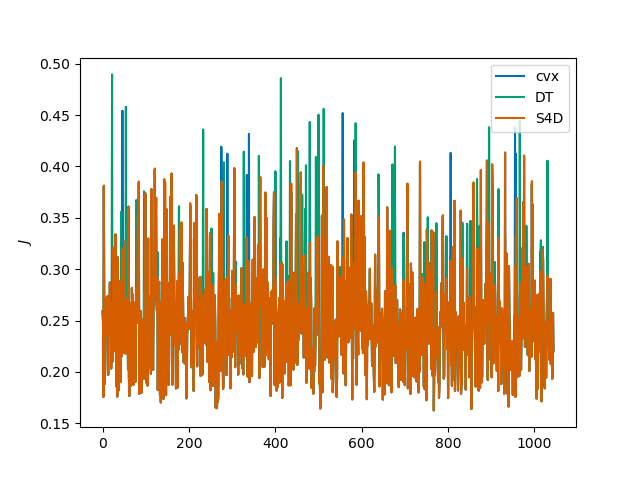

In [28]:
plt.figure()
plt.plot(J_min_scp_cvx_feas, label = 'cvx')
plt.plot(J_min_scp_DT_feas, label = 'DT')
plt.plot(J_min_scp_S4D_feas, label = 'S4D')
plt.ylabel(r'$J$')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Testset analysis as function of CTGS0.
CTGS0 >  0  . Test dataset size:  1165
J_scp_gain_mean_ctgs_0:  0.30154898674264674 J_scp_gain_std_ctgs_0:  4.679607241998551
J_scp_gain2_mean_ctgs_0:  0.30154898674264674
J_scp_percloss_cvx_mean_ctgs_0:  24.657833588598884 J_scp_percloss_cvx_std_ctgs_0:  21.266936774797173
J_scp_percloss_S4D_mean_ctgs_0:  24.11983951784179 J_scp_percloss_S4D_std_ctgs_0:  21.211288610629293
J_scp_percloss_DT_mean_ctgs_0:  25.77200123780246 J_scp_percloss_DT_std_ctgs_0:  25.12443766992082
iter_gain_mean_0:  -2.6412017167381974  iter_gain_std_0:  2.5494293424580126
iter_scp_mean_cvx_0:  3.6137339055793993  iter_scp_std_cvx_0:  2.092738366138472
iter_scp_mean_S4D_0:  6.254935622317596  iter_scp_std_S4D_0:  3.174912944657844
iter_scp_mean_DT_0:  2.8772532188841202  iter_scp_std_DT_0:  1.5356834913697563
DTruntime_gain_mean_0:  1.915541205795026  DTruntime_gain_std_0:  1.8295300013306255
S4Druntime_gain_mean_0:  -1.1978515907418574  S4Druntime_gain_std_0:  2.3316623073

/tmp/ipykernel_2991875/3273245603.py:102: RuntimeWarning: Mean of empty slice.
  J_avg_scp_cvx_feas_ctg = J_min_scp_cvx_feas_ctg.mean()*1000.
/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_2991875/3273245603.py:104: RuntimeWarning: Mean of empty slice.
  J_avg_scp_S4D_feas_ctg = J_min_scp_S4D_feas_ctg.mean()*1000.
/tmp/ipykernel_2991875/3273245603.py:106: RuntimeWarning: Mean of empty slice.
  J_avg_scp_DT_feas_ctg = J_min_scp_DT_feas_ctg.mean()*1000.    # Added line for DT
/tmp/ipykernel_2991875/3273245603.py:107: RuntimeWarning: Mean of empty slice.
  J_avg_cvx_feas_ctg = J_cvx_feas_ctg.mean()*1000.
/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/sit

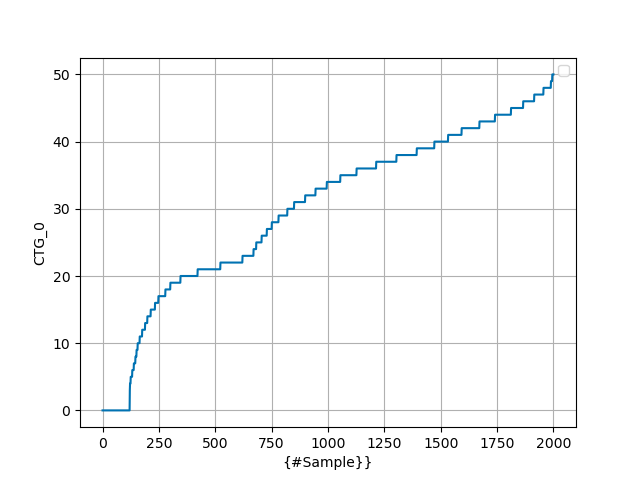

In [29]:
ctgs_range = range(0, 51, 1)
test_dataset_size = np.zeros(shape=(len(ctgs_range),), dtype=int)
J_scp_percgain_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percgain_std_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percgain2_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percloss_cvx_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percloss_cvx_std_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percloss_S4D_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percloss_S4D_std_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percloss_DT_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT
J_scp_percloss_DT_std_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)    # Added line for DT
iter_scp_mean_cvx_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
iter_scp_mean_S4D_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
iter_scp_mean_DT_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT
iter_scp_std_cvx_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
iter_scp_std_S4D_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
iter_scp_std_DT_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)    # Added line for DT
iter_scp_gain_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
iter_scp_gain_std_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 

runtime_mean_cvx_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_mean_S4D_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_mean_DT_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT
runtime_std_cvx_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_std_S4D_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_std_DT_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)    # Added line for DT
runtime_mean_cvx_scp_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_mean_S4D_scp_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_mean_DT_scp_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT
runtime_std_cvx_scp_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_std_S4D_scp_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_std_DT_scp_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)    # Added line for DT
runtime_mean_cvx_tot_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_mean_S4D_tot_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_mean_DT_tot_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT
runtime_std_cvx_tot_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_std_S4D_tot_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_std_DT_tot_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)    # Added line for DT
runtime_gain_mean_ctgsS4D = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_gain_std_ctgsS4D = np.zeros(shape=(len(ctgs_range),), dtype=float)
runtime_gain_mean_ctgsDT = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_gain_std_ctgsDT = np.zeros(shape=(len(ctgs_range),), dtype=float) 

J_relgain_scp_cvx_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_relgain_scp_S4D_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_relgain_scp_DT_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT
J_percgain_scp_S4D_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_percgain_scp_DT_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT

n_unfeas_scp_cvx = np.zeros(shape=(len(ctgs_range),), dtype=float)
n_unfeas_scp_S4D = np.zeros(shape=(len(ctgs_range),), dtype=float)
n_unfeas_scp_DT = np.zeros(shape=(len(ctgs_range),), dtype=float)    # Added line for DT

ctgxx = 1

print('Testset analysis as function of CTGS0.')

fig, ax1 = plt.subplots()
ax1.plot(sorted(ctgs0_cvx))
plt.legend(loc='best')
ax1.set_xlabel('{#Sample}}')
ax1.set_ylabel('CTG_0', color='k')
plt.grid(True)

iter = 0
for ctg in ctgs_range:

    i_ctg = list(set(np.rint(test_dataset_ix[ctgs0_cvx<ctg]).astype(int)))
    i_unfeas_plus_ctg = list(set(i_unfeas2).union(set(i_ctg)))

    ctgs0_cvx_feas_ctg = np.delete(ctgs0_cvx, i_unfeas_plus_ctg, axis=0)
    J_vect_scp_cvx_feas_ctg = np.delete(J_vect_scp_cvx, i_unfeas_plus_ctg, axis=0)
    J_vect_scp_S4D_feas_ctg = np.delete(J_vect_scp_S4D, i_unfeas_plus_ctg, axis=0)
    J_vect_scp_DT_feas_ctg = np.delete(J_vect_scp_DT, i_unfeas_plus_ctg, axis=0)  # Added line for DT
    J_cvx_feas_ctg = np.delete(J_cvx, i_unfeas_plus_ctg, axis=0)
    J_S4D_feas_ctg = np.delete(J_S4D, i_unfeas_plus_ctg, axis=0)
    J_DT_feas_ctg = np.delete(J_DT, i_unfeas_plus_ctg, axis=0)    # Added line for DT
    iter_scp_cvx_feas_ctg = np.delete(iter_scp_cvx, i_unfeas_plus_ctg, axis=0)
    iter_scp_S4D_feas_ctg = np.delete(iter_scp_S4D, i_unfeas_plus_ctg, axis=0)
    iter_scp_DT_feas_ctg = np.delete(iter_scp_DT, i_unfeas_plus_ctg, axis=0)  # Added line for DT
    runtime_cvx_feas_ctg = np.delete(runtime_cvx, i_unfeas_plus_ctg, axis=0)
    runtime_scp_cvx_feas_ctg = np.delete(runtime_scp_cvx, i_unfeas_plus_ctg, axis=0)
    runtime_S4D_feas_ctg = np.delete(runtime_S4D, i_unfeas_plus_ctg, axis=0)
    runtime_DT_feas_ctg = np.delete(runtime_DT, i_unfeas_plus_ctg, axis=0)  # Added line for DT
    runtime_scp_S4D_feas_ctg = np.delete(runtime_scp_S4D, i_unfeas_plus_ctg, axis=0)
    runtime_scp_DT_feas_ctg = np.delete(runtime_scp_DT, i_unfeas_plus_ctg, axis=0)

    if ctg == ctgxx:
        J_vect_scp_cvx_feas_ctgxx = J_vect_scp_cvx_feas_ctg
        J_vect_scp_S4D_feas_ctgxx = J_vect_scp_S4D_feas_ctg
        J_vect_scp_DT_feas_ctgxx = J_vect_scp_DT_feas_ctg    # Added line for DT
        J_cvx_feas_ctgxx = J_cvx_feas_ctg
        J_S4D_feas_ctgxx = J_S4D_feas_ctg
        J_DT_feas_ctgxx = J_DT_feas_ctg  # Added line for DT
        iter_scp_cvx_feas_ctgxx = iter_scp_cvx_feas_ctg
        iter_scp_S4D_feas_ctgxx = iter_scp_S4D_feas_ctg
        iter_scp_DT_feas_ctgxx = iter_scp_DT_feas_ctg  # Added line for DT

    test_dataset_size[iter] = len(ctgs0_cvx_feas_ctg)
    print('CTGS0 > ', ctg, ' . Test dataset size: ', test_dataset_size[iter])
    J_min_scp_cvx_feas_ctg = np.min(J_vect_scp_cvx_feas_ctg, axis=1)
    J_avg_scp_cvx_feas_ctg = J_min_scp_cvx_feas_ctg.mean()*1000.
    J_min_scp_S4D_feas_ctg = np.min(J_vect_scp_S4D_feas_ctg, axis=1)
    J_avg_scp_S4D_feas_ctg = J_min_scp_S4D_feas_ctg.mean()*1000.
    J_min_scp_DT_feas_ctg = np.min(J_vect_scp_DT_feas_ctg, axis=1)  # Added line for DT
    J_avg_scp_DT_feas_ctg = J_min_scp_DT_feas_ctg.mean()*1000.    # Added line for DT
    J_avg_cvx_feas_ctg = J_cvx_feas_ctg.mean()*1000.

    J_scp_percgain_mean_ctgs[iter] = np.mean((J_min_scp_cvx_feas_ctg - J_min_scp_S4D_feas_ctg)/J_min_scp_cvx_feas_ctg*100)
    J_scp_percgain_std_ctgs[iter] = np.std((J_min_scp_cvx_feas_ctg - J_min_scp_S4D_feas_ctg)/J_min_scp_cvx_feas_ctg*100)
    print('J_scp_gain_mean_ctgs_' + str(ctg) + ': ', J_scp_percgain_mean_ctgs[iter], 'J_scp_gain_std_ctgs_' + str(ctg) + ': ', J_scp_percgain_std_ctgs[iter])

    J_scp_percgain2_mean_ctgs[iter] = np.mean((J_min_scp_cvx_feas_ctg - J_min_scp_S4D_feas_ctg))/np.mean((J_min_scp_cvx_feas_ctg - J_cvx_feas_ctg))*100
    print('J_scp_gain2_mean_ctgs_' + str(ctg) + ': ', J_scp_percgain_mean_ctgs[iter])

    J_scp_percloss_cvx_mean_ctgs[iter] = np.mean((J_min_scp_cvx_feas_ctg - J_cvx_feas_ctg)/J_cvx_feas_ctg*100)
    J_scp_percloss_cvx_std_ctgs[iter] = np.std((J_min_scp_cvx_feas_ctg - J_cvx_feas_ctg)/J_cvx_feas_ctg*100)
    J_scp_percloss_S4D_mean_ctgs[iter] = np.mean((J_min_scp_S4D_feas_ctg - J_cvx_feas_ctg)/J_cvx_feas_ctg*100)
    J_scp_percloss_S4D_std_ctgs[iter] = np.std((J_min_scp_S4D_feas_ctg - J_cvx_feas_ctg)/J_cvx_feas_ctg*100)
    J_scp_percloss_DT_mean_ctgs[iter] = np.mean((J_min_scp_DT_feas_ctg - J_cvx_feas_ctg)/J_cvx_feas_ctg*100)    # Added line for DT
    J_scp_percloss_DT_std_ctgs[iter] = np.std((J_min_scp_DT_feas_ctg - J_cvx_feas_ctg)/J_cvx_feas_ctg*100)    # Added line for DT
    print('J_scp_percloss_cvx_mean_ctgs_' + str(ctg) + ': ', J_scp_percloss_cvx_mean_ctgs[iter], 'J_scp_percloss_cvx_std_ctgs_' + str(ctg) + ': ', J_scp_percloss_cvx_std_ctgs[iter])
    print('J_scp_percloss_S4D_mean_ctgs_' + str(ctg) + ': ', J_scp_percloss_S4D_mean_ctgs[iter], 'J_scp_percloss_S4D_std_ctgs_' + str(ctg) + ': ', J_scp_percloss_S4D_std_ctgs[iter])
    print('J_scp_percloss_DT_mean_ctgs_' + str(ctg) + ': ', J_scp_percloss_DT_mean_ctgs[iter], 'J_scp_percloss_DT_std_ctgs_' + str(ctg) + ': ', J_scp_percloss_DT_std_ctgs[iter])

    iter_scp_mean_cvx_ctgs[iter] = np.mean(iter_scp_cvx_feas_ctg)
    iter_scp_mean_S4D_ctgs[iter] = np.mean(iter_scp_S4D_feas_ctg)
    iter_scp_mean_DT_ctgs[iter] = np.mean(iter_scp_DT_feas_ctg)  # Added line for DT
    iter_scp_std_cvx_ctgs[iter] = np.std(iter_scp_cvx_feas_ctg)
    iter_scp_std_S4D_ctgs[iter] = np.std(iter_scp_S4D_feas_ctg)
    iter_scp_std_DT_ctgs[iter] = np.std(iter_scp_DT_feas_ctg)    # Added line for DT
    iter_scp_gain_mean_ctgs[iter] = np.mean(iter_scp_cvx_feas_ctg - iter_scp_S4D_feas_ctg)
    iter_scp_gain_std_ctgs[iter] = np.std(iter_scp_cvx_feas_ctg - iter_scp_S4D_feas_ctg)
    print('iter_gain_mean_' + str(ctg) + ': ', iter_scp_gain_mean_ctgs[iter], ' iter_gain_std_' + str(ctg) + ': ', iter_scp_gain_std_ctgs[iter])
    print('iter_scp_mean_cvx_' + str(ctg) + ': ', iter_scp_mean_cvx_ctgs[iter], ' iter_scp_std_cvx_' + str(ctg) + ': ', iter_scp_std_cvx_ctgs[iter])
    print('iter_scp_mean_S4D_' + str(ctg) + ': ', iter_scp_mean_S4D_ctgs[iter], ' iter_scp_std_S4D_' + str(ctg) + ': ', iter_scp_std_S4D_ctgs[iter])
    print('iter_scp_mean_DT_' + str(ctg) + ': ', iter_scp_mean_DT_ctgs[iter], ' iter_scp_std_DT_' + str(ctg) + ': ', iter_scp_std_DT_ctgs[iter])

    runtime_mean_cvx_ctgs[iter] = np.mean(runtime_cvx_feas_ctg)
    runtime_mean_S4D_ctgs[iter] = np.mean(runtime_S4D_feas_ctg)
    runtime_mean_DT_ctgs[iter] = np.mean(runtime_DT_feas_ctg)  # Added line for DT
    runtime_std_cvx_ctgs[iter] = np.std(runtime_cvx_feas_ctg)
    runtime_std_S4D_ctgs[iter] = np.std(runtime_S4D_feas_ctg)
    runtime_std_DT_ctgs[iter] = np.std(runtime_DT_feas_ctg)    # Added line for DT
    runtime_mean_cvx_scp_ctgs[iter] = np.mean(runtime_scp_cvx_feas_ctg)
    runtime_mean_S4D_scp_ctgs[iter] = np.mean(runtime_scp_S4D_feas_ctg)
    runtime_mean_DT_scp_ctgs[iter] = np.mean(runtime_scp_DT_feas_ctg)  # Added line for DT
    runtime_std_cvx_scp_ctgs[iter] = np.std(runtime_scp_cvx_feas_ctg)
    runtime_std_S4D_scp_ctgs[iter] = np.std(runtime_scp_S4D_feas_ctg)
    runtime_std_DT_scp_ctgs[iter] = np.std(runtime_scp_DT_feas_ctg)    # Added line for DT

    runtime_mean_cvx_tot_ctgs[iter] = np.mean(runtime_cvx_feas_ctg + runtime_scp_cvx_feas_ctg)
    runtime_mean_S4D_tot_ctgs[iter] = np.mean(runtime_S4D_feas_ctg + runtime_scp_S4D_feas_ctg)
    runtime_mean_DT_tot_ctgs[iter] = np.mean(runtime_DT_feas_ctg + runtime_scp_DT_feas_ctg)
    runtime_std_cvx_tot_ctgs[iter] = np.std(runtime_cvx_feas_ctg + runtime_scp_cvx_feas_ctg)
    runtime_std_S4D_tot_ctgs[iter] = np.std(runtime_S4D_feas_ctg + runtime_scp_S4D_feas_ctg)
    runtime_std_DT_tot_ctgs[iter] = np.std(runtime_DT_feas_ctg + runtime_scp_DT_feas_ctg)
    runtime_gain_mean_ctgsS4D[iter] = np.mean((runtime_cvx_feas_ctg + runtime_scp_cvx_feas_ctg) - (runtime_S4D_feas_ctg + runtime_scp_S4D_feas_ctg))
    runtime_gain_std_ctgsS4D[iter] = np.std((runtime_cvx_feas_ctg + runtime_scp_cvx_feas_ctg) - (runtime_S4D_feas_ctg + runtime_scp_S4D_feas_ctg))
    runtime_gain_mean_ctgsDT[iter] = np.mean((runtime_cvx_feas_ctg + runtime_scp_cvx_feas_ctg) - (runtime_DT_feas_ctg + runtime_scp_DT_feas_ctg))
    runtime_gain_std_ctgsDT[iter] = np.std((runtime_cvx_feas_ctg + runtime_scp_cvx_feas_ctg) - (runtime_DT_feas_ctg + runtime_scp_DT_feas_ctg))

    # print('DTruntime_gain_mean_' + str(ctg) + ': ', runtime_gain_mean_ctgsDT[iter], 'runtime_gain_std_' + str(ctg) + ': ', runtime_gain_std_ctgsDT[iter])
    # print('S4Druntime_gain_mean_' + str(ctg) + ': ', runtime_gain_mean_ctgsS4D[iter], 'runtime_gain_std_' + str(ctg) + ': ', runtime_gain_std_ctgsS4D[iter])

    print('DTruntime_gain_mean_' + str(ctg) + ': ', runtime_gain_mean_ctgsDT[iter], ' DTruntime_gain_std_' + str(ctg) + ': ', runtime_gain_std_ctgsDT[iter])
    print('S4Druntime_gain_mean_' + str(ctg) + ': ', runtime_gain_mean_ctgsS4D[iter], ' S4Druntime_gain_std_' + str(ctg) + ': ', runtime_gain_std_ctgsS4D[iter])
    print('runtime_scp_mean_cvx_' + str(ctg) + ': ', runtime_mean_cvx_tot_ctgs[iter], ' runtime_scp_std_cvx_' + str(ctg) + ': ', runtime_std_cvx_tot_ctgs[iter])
    print('runtime_scp_mean_DT_' + str(ctg) + ': ', runtime_mean_DT_tot_ctgs[iter], ' runtime_scp_std_DT_' + str(ctg) + ': ', runtime_std_DT_tot_ctgs[iter])
    print('runtime_scp_mean_S4D_' + str(ctg) + ': ', runtime_mean_S4D_tot_ctgs[iter], ' runtime_scp_std_S4D_' + str(ctg) + ': ', runtime_std_S4D_tot_ctgs[iter])


    J_relgain_scp_cvx_mean_ctgs[iter] = J_avg_scp_cvx_feas_ctg - J_avg_cvx_feas_ctg
    
    J_relgain_scp_DT_mean_ctgs[iter] = J_avg_scp_DT_feas_ctg - J_avg_cvx_feas_ctg
    J_percgain_scp_DT_mean_ctgs[iter] = (J_avg_scp_cvx_feas_ctg - J_avg_scp_DT_feas_ctg) / (J_avg_scp_cvx_feas_ctg - J_avg_cvx_feas_ctg)

    J_relgain_scp_S4D_mean_ctgs[iter] = J_avg_scp_S4D_feas_ctg - J_avg_cvx_feas_ctg
    J_percgain_scp_S4D_mean_ctgs[iter] = (J_avg_scp_cvx_feas_ctg - J_avg_scp_S4D_feas_ctg) / (J_avg_scp_cvx_feas_ctg - J_avg_cvx_feas_ctg)
    i_ctg2 = list(set(np.rint(test_dataset_ix[ctgs0_cvx>=ctg]).astype(int)))

    i_unfeas_scp_cvx_ctg = list(set(i_unfeas_scp_cvx).intersection(set(i_ctg2)))
    i_unfeas_scp_DT_ctg = list(set(i_unfeas_DT).intersection(set(i_ctg2)))
    i_unfeas_scp_S4D_ctg = list(set(i_unfeas_S4D).intersection(set(i_ctg2)))
    
    n_unfeas_scp_cvx[iter] = (len(i_unfeas_scp_cvx_ctg)/len(i_ctg2))*100
    n_unfeas_scp_DT[iter] = (len(i_unfeas_scp_DT_ctg)/len(i_ctg2))*100
    n_unfeas_scp_S4D[iter] = (len(i_unfeas_scp_S4D_ctg)/len(i_ctg2))*100

    iter += 1

In [30]:
print(J_percgain_scp_DT_mean_ctgs)

[-0.03559084 -0.03567449 -0.03567449 -0.03567449 -0.03567473 -0.03567769
 -0.0356834  -0.03570182 -0.03571635 -0.0357298  -0.03576343 -0.0357957
 -0.03585735 -0.03595105 -0.03603663 -0.03617228 -0.0363828  -0.03653451
 -0.03694417 -0.03731663 -0.03821741 -0.03972301 -0.03901809 -0.04021704
 -0.04146024 -0.041888   -0.04249973 -0.04319907 -0.0403638  -0.03715611
 -0.03815535 -0.035577   -0.03336293 -0.03087128 -0.03626391 -0.03884596
 -0.03040708 -0.03522201 -0.07244815 -0.08411061 -0.1002733  -0.10355387
 -0.10998018 -0.12224641 -0.14651501 -0.14439394 -0.15508788 -0.23760564
 -0.17155755  0.19403086         nan]


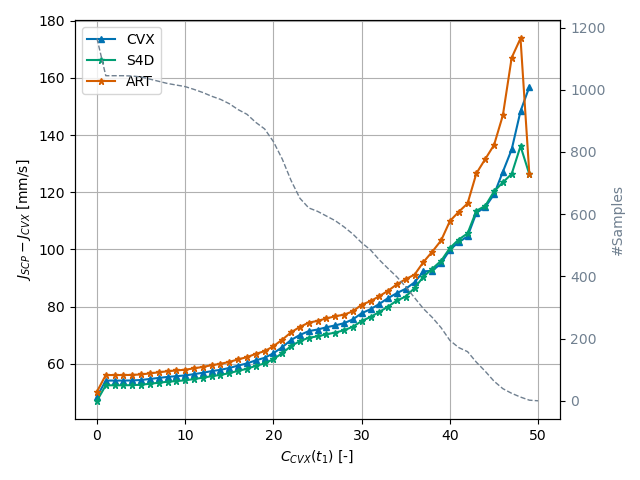

In [31]:
#%matplotlib ipympl
plt.style.use('seaborn-v0_8-colorblind')

fig, ax1 = plt.subplots()
color = 'black'
ax1.set_xlabel(r'$C_{CVX}(t_1)$ [-]')
ax1.set_ylabel(r'$J_{SCP} - J_{CVX}$ [mm/s]', color='k')
ax1.plot(ctgs_range, J_relgain_scp_cvx_mean_ctgs, marker='^', markersize=5, label='CVX')
if rl:
    ax1.plot(ctgs_range, J_relgain_scp_S4D_mean_ctgs, marker='*', markersize=5,  label='S4D')
    ax1.plot(ctgs_range, J_relgain_scp_DT_mean_ctgs, marker='*', markersize=5,  label='ART')
else:
    ax1.plot(ctgs_range, J_relgain_scp_S4D_mean_ctgs, marker='*', markersize=5,  label='ART-IL')
ax1.tick_params(axis='y', labelcolor=color)
# plt.hlines(0, 0, 51, linestyle='--', color='k')
# plt.ylim([-0.01, 0.01])
plt.legend(loc='best')
plt.grid(True)
ax2 = ax1.twinx() 
color = 'slategray'
ax2.set_ylabel('#Samples', color=color)
ax2.plot(ctgs_range, test_dataset_size, color=color, linestyle='--', linewidth=1)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
if save_plots:
    if rl:
        plt.savefig(root_folder + '/optimization/saved_files/plots/optimality_2axis_plot_rl.png', dpi=600)
    else:
        plt.savefig(root_folder + '/optimization/saved_files/plots/optimality_2axis_plot_il.png', dpi=600)


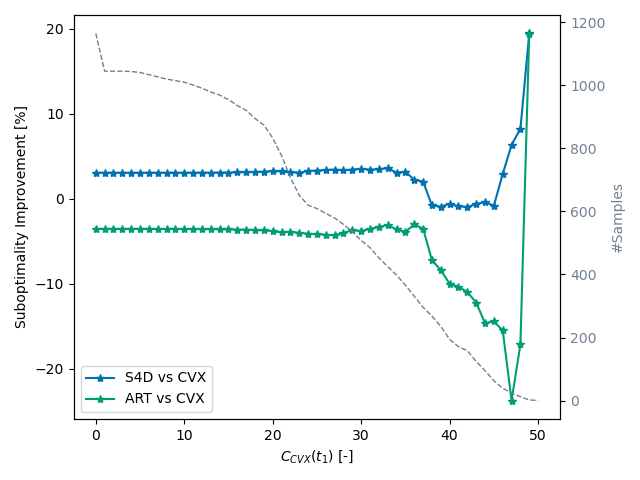

In [32]:

fig, ax1 = plt.subplots()
color = 'black'
ax1.set_xlabel(r'$C_{CVX}(t_1)$ [-]')
ax1.set_ylabel(r'Suboptimality Improvement [%]', color='k')
if rl:
    ax1.plot(ctgs_range, J_percgain_scp_S4D_mean_ctgs*100., marker='*', label='S4D vs CVX')
    ax1.plot(ctgs_range, J_percgain_scp_DT_mean_ctgs*100., marker='*', label='ART vs CVX')
else:
    ax1.plot(ctgs_range, J_percgain_scp_S4D_mean_ctgs*100., marker='*', label='ART-IL vs CVX')
ax1.tick_params(axis='y', labelcolor=color)
if rl:
    plt.legend(loc='lower left')
else:
    plt.legend(loc='lower left')
ax2 = ax1.twinx() 
color = 'slategray'
ax2.set_ylabel('#Samples', color=color)
ax2.plot(ctgs_range, test_dataset_size, color=color, linestyle='--', linewidth=1)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
if save_plots:
    if rl:
        plt.savefig(root_folder + '/optimization/saved_files/plots/perc_optimality_2axis_plot_rl.png', dpi=600)
    else:
        plt.savefig(root_folder + '/optimization/saved_files/plots/perc_optimality_2axis_plot_il.png', dpi=600)




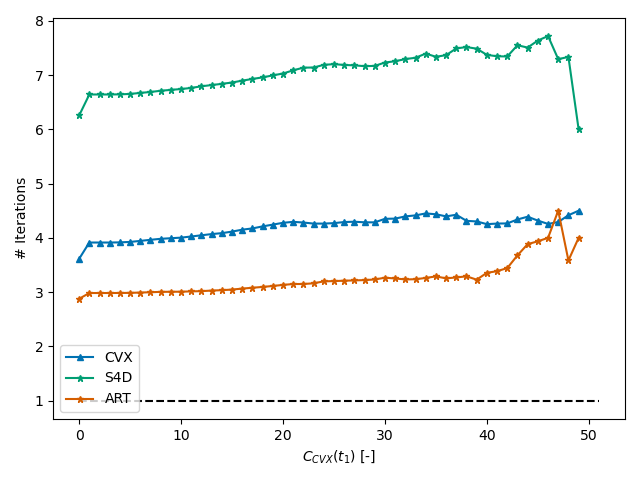

In [33]:
fig, ax1 = plt.subplots()
color = 'black'
ax1.set_xlabel(r'$C_{CVX}(t_1)$ [-]')
ax1.set_ylabel(r'# Iterations', color='k')
ax1.plot(ctgs_range, iter_scp_mean_cvx_ctgs, marker='^', markersize=5, label='CVX')
if rl:
    ax1.plot(ctgs_range, iter_scp_mean_S4D_ctgs, marker='*', markersize=5,  label='S4D')
    ax1.plot(ctgs_range, iter_scp_mean_DT_ctgs, marker='*', markersize=5,  label='ART')
else:
    ax1.plot(ctgs_range, iter_scp_mean_S4D_ctgs, marker='*', markersize=5,  label='ART-IL')
ax1.tick_params(axis='y', labelcolor=color)
plt.hlines(1, 0, 51, linestyle='--', color='k')
plt.legend(loc='lower left')
# ax2 = ax1.twinx() 
# color = 'slategray'
# ax2.set_ylabel('#Samples', color=color)
# ax2.plot(ctgs_range, test_dataset_size, color=color, linestyle='--', linewidth=1)
# ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
if save_plots:
    if rl:
        plt.savefig(root_folder + '/optimization/saved_files/plots/iterations_2axis_plot_rl.png', dpi=600)
    else:
        plt.savefig(root_folder + '/optimization/saved_files/plots/iterations_2axis_plot_il.png', dpi=600)



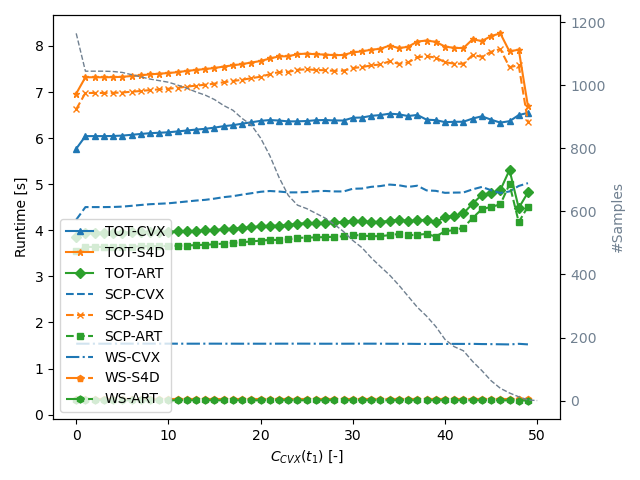

In [34]:
fig, ax1 = plt.subplots()
color = 'black'
ax1.set_xlabel(r'$C_{CVX}(t_1)$ [-]')
ax1.set_ylabel(r'Runtime [s]', color='k')

# Assign different markers and colors
ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs, marker='^', markersize=5, color='#1f77b4', label='TOT-CVX')
if rl:
    ax1.plot(ctgs_range, runtime_mean_S4D_tot_ctgs, marker='*', markersize=5, color='#ff7f0e', label='TOT-S4D')
    ax1.plot(ctgs_range, runtime_mean_DT_tot_ctgs, marker='D', markersize=5, color='#2ca02c', label='TOT-ART')
else:
    ax1.plot(ctgs_range, runtime_mean_S4D_tot_ctgs, marker='*', markersize=5, color='#ff7f0e', label='TOT-ART-IL')

ax1.plot(ctgs_range, runtime_mean_cvx_scp_ctgs, linestyle='--', color='#1f77b4', label='SCP-CVX')
if rl:
    ax1.plot(ctgs_range, runtime_mean_S4D_scp_ctgs, linestyle='--',color='#ff7f0e', marker='x', markersize=5, label='SCP-S4D')
    ax1.plot(ctgs_range, runtime_mean_DT_scp_ctgs, linestyle='--', color='#2ca02c', marker='s', markersize=5, label='SCP-ART')
else:
    ax1.plot(ctgs_range, runtime_mean_S4D_scp_ctgs, linestyle='--', color='#D55E00', marker='x', markersize=5, label='SCP-ART-IL')

ax1.plot(ctgs_range, runtime_mean_cvx_ctgs, linestyle='-.', color='#1f77b4', label='WS-CVX')
if rl:
    ax1.plot(ctgs_range, runtime_mean_S4D_ctgs, linestyle='-.', color='#ff7f0e', marker='p', markersize=5, label='WS-S4D')
    ax1.plot(ctgs_range, runtime_mean_DT_ctgs, linestyle='-.', color='#2ca02c', marker='h', markersize=5, label='WS-ART')
else:
    ax1.plot(ctgs_range, runtime_mean_S4D_ctgs, linestyle='-.', color='orangered', marker='p', markersize=5, label='WS-ART-IL')

ax1.tick_params(axis='y', labelcolor='k')
plt.legend(loc='lower left')

ax2 = ax1.twinx()
color = 'slategray'
ax2.set_ylabel('#Samples', color=color)
ax2.plot(ctgs_range, test_dataset_size, color=color, linestyle='--', linewidth=1)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

if save_plots:
    if rl:
        plt.savefig(root_folder + '/optimization/saved_files/plots/runtime_2axis_plot_rl.png', dpi=600)
    else:
        plt.savefig(root_folder + '/optimization/saved_files/plots/runtime_2axis_plot_il.png', dpi=600)


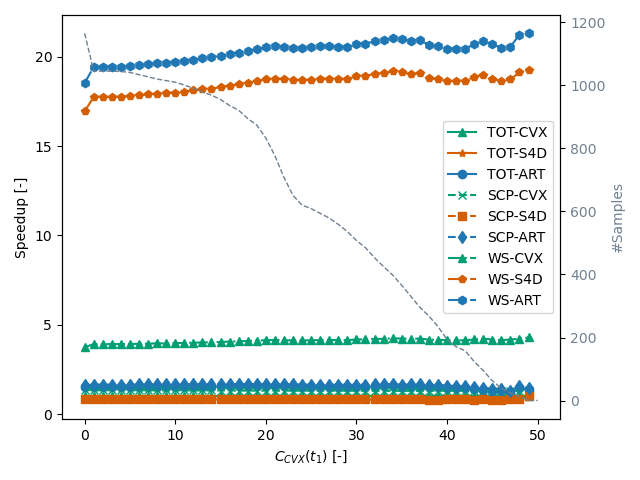

In [35]:
fig, ax1 = plt.subplots()
color = 'black'
ax1.set_xlabel(r'$C_{CVX}(t_1)$ [-]')
ax1.set_ylabel(r'Speedup [-]', color='k')

# CVX Type - Greenish color with triangle marker
ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_cvx_tot_ctgs, linestyle='-', marker='^', color='#009E73', label='TOT-CVX')

# S4D Type - Orange color with star marker
if rl:
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_S4D_tot_ctgs, linestyle='-', marker='*', color='#D55E00', label='TOT-S4D')
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_DT_tot_ctgs, linestyle='-', marker='o', color='#1f77b4', label='TOT-ART')
else:
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_S4D_tot_ctgs, linestyle='-', marker='*', color='#D55E00', label='TOT-ART-IL')

# SCP-CVX - Greenish color with triangle marker
ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_cvx_scp_ctgs, linestyle='--', color='#009E73', marker='x', label='SCP-CVX')

# SCP-S4D - Orange color with star marker
if rl:
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_S4D_scp_ctgs, linestyle='--', color='#D55E00', marker='s', label='SCP-S4D')
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_DT_scp_ctgs, linestyle='--', color='#1f77b4', marker='d', label='SCP-ART')
else:
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_S4D_scp_ctgs, linestyle='--', color='#D55E00', marker='*', label='SCP-ART-IL')

# WS-CVX - Greenish color with triangle marker
ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_cvx_ctgs, linestyle='-.', color='#009E73', marker='^', label='WS-CVX')

# WS-S4D - Orange color with star marker
if rl:
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_S4D_ctgs, linestyle='-.', color='#D55E00', marker='p', label='WS-S4D')
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_DT_ctgs, linestyle='-.', color='#1f77b4', marker='h', label='WS-ART')
else:
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_S4D_ctgs, linestyle='-.', color='orangered', marker='s', label='WS-ART-IL')

ax1.tick_params(axis='y', labelcolor=color)
plt.legend(loc='best')

ax2 = ax1.twinx()
color = 'slategray'
ax2.set_ylabel('#Samples', color=color)
ax2.plot(ctgs_range, test_dataset_size, color=color, linestyle='--', linewidth=1)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

if save_plots:
    if rl:
        plt.savefig(root_folder + '/optimization/saved_files/plots/speedup_2axis_plot_rl.png', dpi=600)
    else:
        plt.savefig(root_folder + '/optimization/saved_files/plots/speedup_2axis_plot_il.png', dpi=600)
